# HomeRun Analysis
## For the start of the 2017 season
### MSP 04.03.2017

This is a jupyter notebook that examines the home run production of individuals during the 2016 season, with a goal of projecting the home run production forward.

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# now read in all the data: it's a lot, but is set up this way so that
#  we can slice across batting order.

#
# general fangraphs data for players
#
# all with > 100 PA at given lineup position

def read_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skip_header=1,delimiter=',')
    return BatData



Total2016   = read_batting_data('2016Batting/TotalBatting.csv')

First2016   = read_batting_data('2016Batting/BattingFirst.csv')
Second2016  = read_batting_data('2016Batting/BattingSecond.csv')
Third2016   = read_batting_data('2016Batting/BattingThird.csv')
Fourth2016  = read_batting_data('2016Batting/BattingFourth.csv')
Fifth2016   = read_batting_data('2016Batting/BattingFifth.csv')
Sixth2016   = read_batting_data('2016Batting/BattingSixth.csv')
Seventh2016 = read_batting_data('2016Batting/BattingSeventh.csv')
Eighth2016  = read_batting_data('2016Batting/BattingEighth.csv')
Ninth2016   = read_batting_data('2016Batting/BattingNinth.csv')

#
# we'll also read in some statcast data for an argument below
#
#    (https://baseballsavant.mlb.com/)

def read_statcast_data(infile):
    outdict = np.genfromtxt(infile,\
        dtype={'names': ("pitch_type","pitch_id","game_date",\
                         "start_speed","x0","z0","player_name","batter","pitcher",\
                         "events","description","spin_dir","spin_rate","break_angle",\
                         "break_length","zone","des","game_type","stand","p_throws",\
                         "home_team","away_team","type","hit_location","bb_type",\
                         "balls","strikes","game_year","pfx_x","pfx_z","px","pz",\
                         "on_3b","on_2b","on_1b","outs_when_up","inning","inning_topbot",\
                         "hc_x","hc_y","tfs","tfs_zulu","catcher","umpire","sv_id",\
                         "vx0","vy0","vz0","ax","ay","az","sz_top","sz_bot","hit_distance_sc",\
                         "hit_speed","hit_angle","effective_speed","release_spin_rate",\
                         "release_extension","game_pk"),\
                'formats': ('S2','S20','S20',\
                            'f4','S20','S20','S20','S20','S20',\
                            'S40','S40','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20','S20',\
                            'S20','S20','S20','S20','S20','S20','S20','S20','S20',\
                            'f4','f4','f4','f4',
                            'S20','S20')},\
                 skip_header=1,delimiter=',')
    return outdict

Sanchez   = read_statcast_data('2016Batting/SanchezStatcast.csv')
Bryant    = read_statcast_data('2016Batting/BryantStatcast.csv')
AugustMLB = read_statcast_data('2016Batting/AugustStatcast.csv')





As a first plot, let's look at the production curve for home runs (that is, what does the distribution function of home runs look like in the MLB?).

/Users/mpetersen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


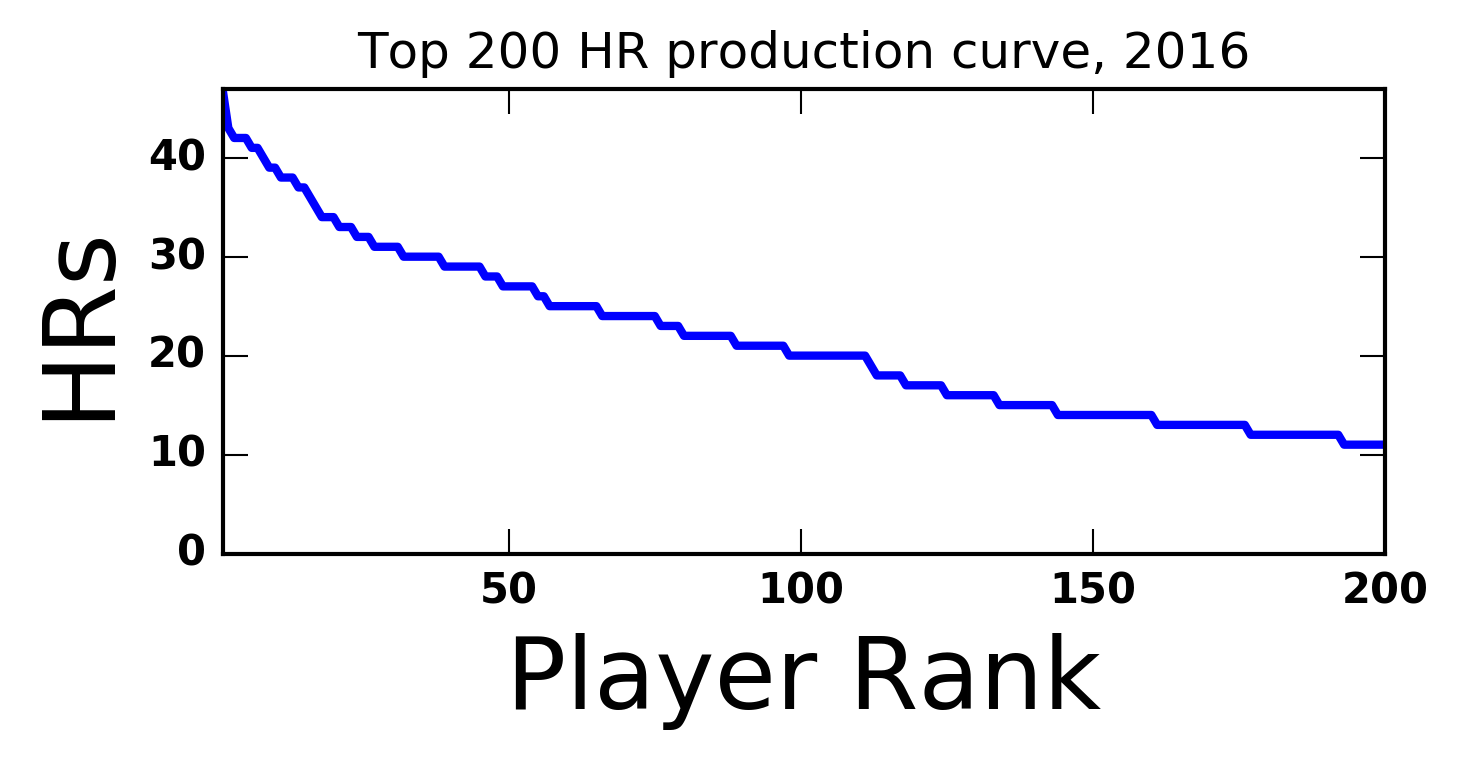

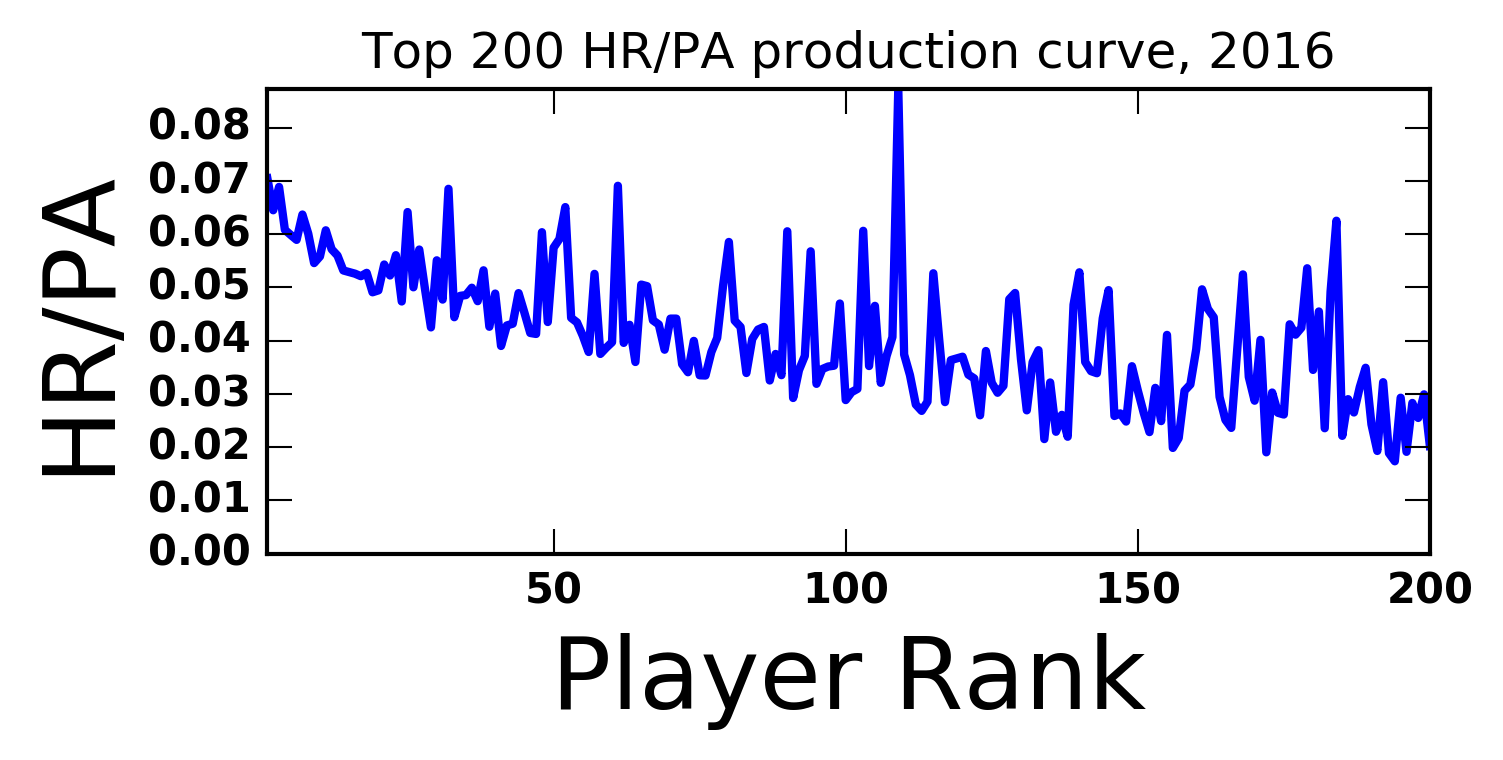

In [3]:
hrs = Total2016['HR']
pas = Total2016['PA']
names = Total2016['Name']

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,hrs.size,hrs.size),hrs[(-1.*hrs).argsort()])
plt.xlabel('Player Rank',size=24)
plt.ylabel('HRs',size=24)
plt.title('Top 200 HR production curve, 2016')
_ = plt.axis([1.,200.,np.min(hrs),np.max(hrs)])

# of the top 200, what does the distribution of hrs/pas look like?
top_x_players = 200
top_hrs     = hrs[(-1.*hrs).argsort()][0:top_x_players]
top_hrs_pas = pas[(-1.*hrs).argsort()][0:top_x_players]
top_hrs_names = names[(-1.*hrs).argsort()][0:top_x_players]

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,top_hrs.size,top_hrs.size),top_hrs/top_hrs_pas)
plt.xlabel('Player Rank',size=24)
plt.ylabel('HR/PA',size=24)
plt.title('Top 200 HR/PA production curve, 2016')


_ = plt.axis([1.,200.,np.min(hrs/pas),np.max(hrs/pas)])



#### What to notice? 

Right off the bat (no pun intended), we added a second plot for complexity. What that plot does is show for the top 200 home run producers what their average hr/pa was over the season. The distribution roughly tracks with the home run production, apart from one very conspicuous outlier. Who is that?

In [4]:
x = np.where( (top_hrs/top_hrs_pas) == np.max(top_hrs/top_hrs_pas))[0]
print ('With {0:4.3f} HR/PA, {1} comes in first.'.format(np.max(top_hrs/top_hrs_pas),top_hrs_names[x][0]))

x = Total2016['HR'][np.where(Total2016['Name']=='Gary Sanchez')[0]][0]
print ('                                        ...and he hit {0:3d} HRs!'.format(int(x)))

With 0.087 HR/PA, Gary Sanchez comes in first.
                                        ...and he hit  20 HRs!


It's Gary Sanchez! Based on the rest of the curve values, it's pretty easy to state that Sanchez hit HRs at an unsustainable pace. Let's see if we can quantify this a bit by using statcast data.

/Users/mpetersen/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:439: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


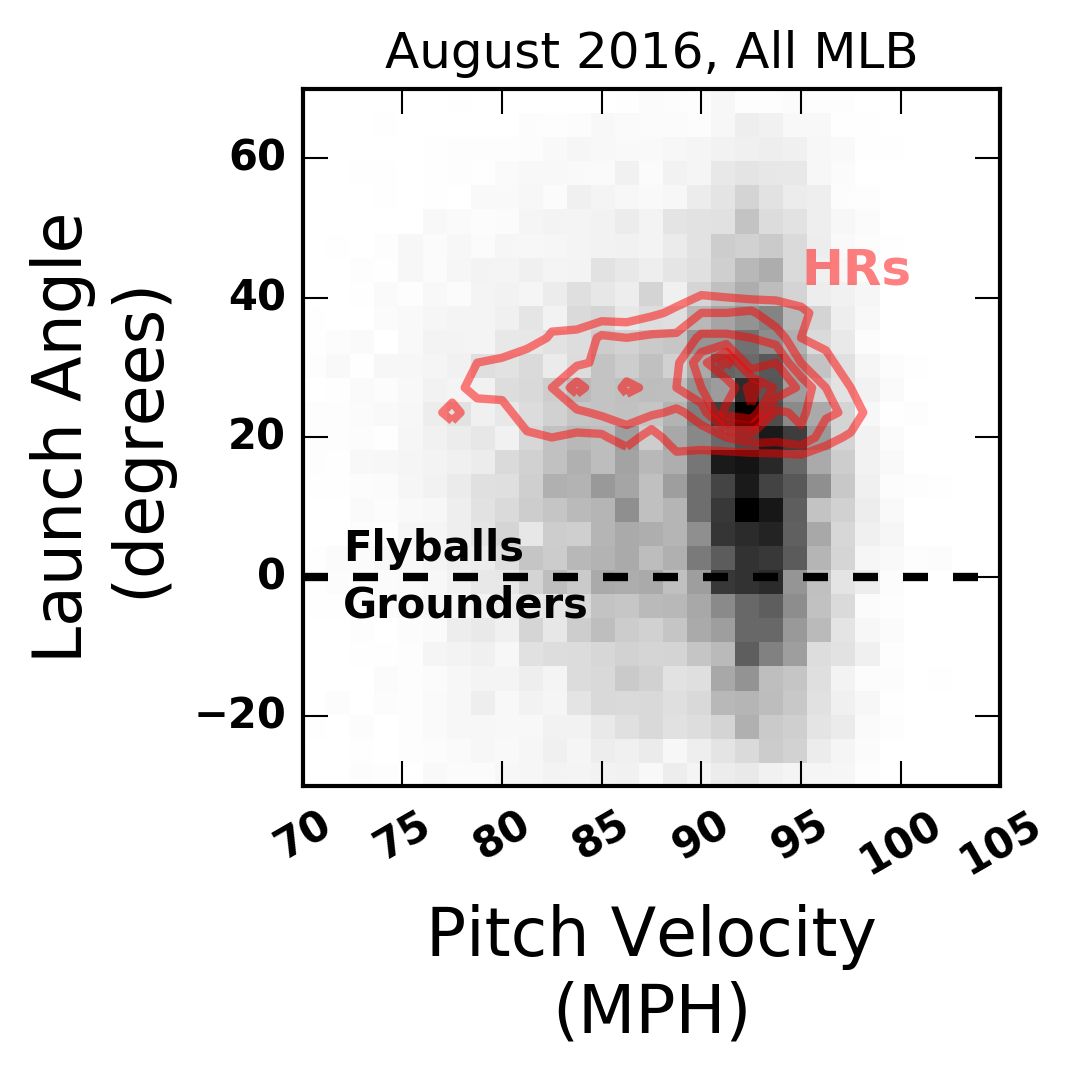

In [5]:
hrs = np.where(AugustMLB['events'] == 'Home Run')[0]

G, xedges, yedges = np.histogram2d(AugustMLB['start_speed'][hrs],AugustMLB['hit_angle'][hrs], \
                                   bins=(np.linspace(70.,105.,30),np.linspace(-30.,70.,30)))
G = G.T  # Let each row list bins with common y range.


H, xedges, yedges = np.histogram2d(AugustMLB['start_speed'],AugustMLB['hit_angle'], \
                                   bins=(np.linspace(70.,105.,30),np.linspace(-30.,70.,30)))
H = H.T  # Let each row list bins with common y range.

fig,ax = plt.subplots(figsize=(3,3))
ax.set_title('August 2016, All MLB')
X, Y = np.meshgrid(xedges, yedges)
X2, Y2 = np.meshgrid(np.linspace(70.,105.,29),np.linspace(-30.,70.,29))
ax.pcolormesh(X, Y, H,cmap=cm.Greys)
ax.contour(X2,Y2,G,6,colors='red',lw=0.05,alpha=0.5)
ax.set_xlabel('Pitch Velocity\n(MPH)',size=16)
ax.set_ylabel('Launch Angle\n(degrees)',size=16)
ax.axis([xedges[0],xedges[-1],yedges[0],yedges[-1]])

for label in ax.get_xticklabels():
    label.set_rotation(30)
    #label.set_fontsize(10)
    label.set_horizontalalignment("center")

ax.plot([60,105],[0.,0.],color='black',linestyle='dashed')
_ = ax.text(72,1,'Flyballs',va='bottom')
_ = ax.text(72,-1,'Grounders',va='top')
_ = ax.text(95,42,'HRs',color='red',alpha=0.5,size=12)


The plot above is showing a few things:
1. Most launch angles are between 0 and +20 degrees.
2. Lots of fastballs are thrown, and have well-distributed launch angles.
3. Home Runs have launch angles between +20 to +40 degrees, but are largely independent of pitch velocity.

This gives us a sense of how to contextualize the statcast data from other batters--specifically looking at Sanchez in this case. Let's take the plot from above and throw Sanchez' data points on it.

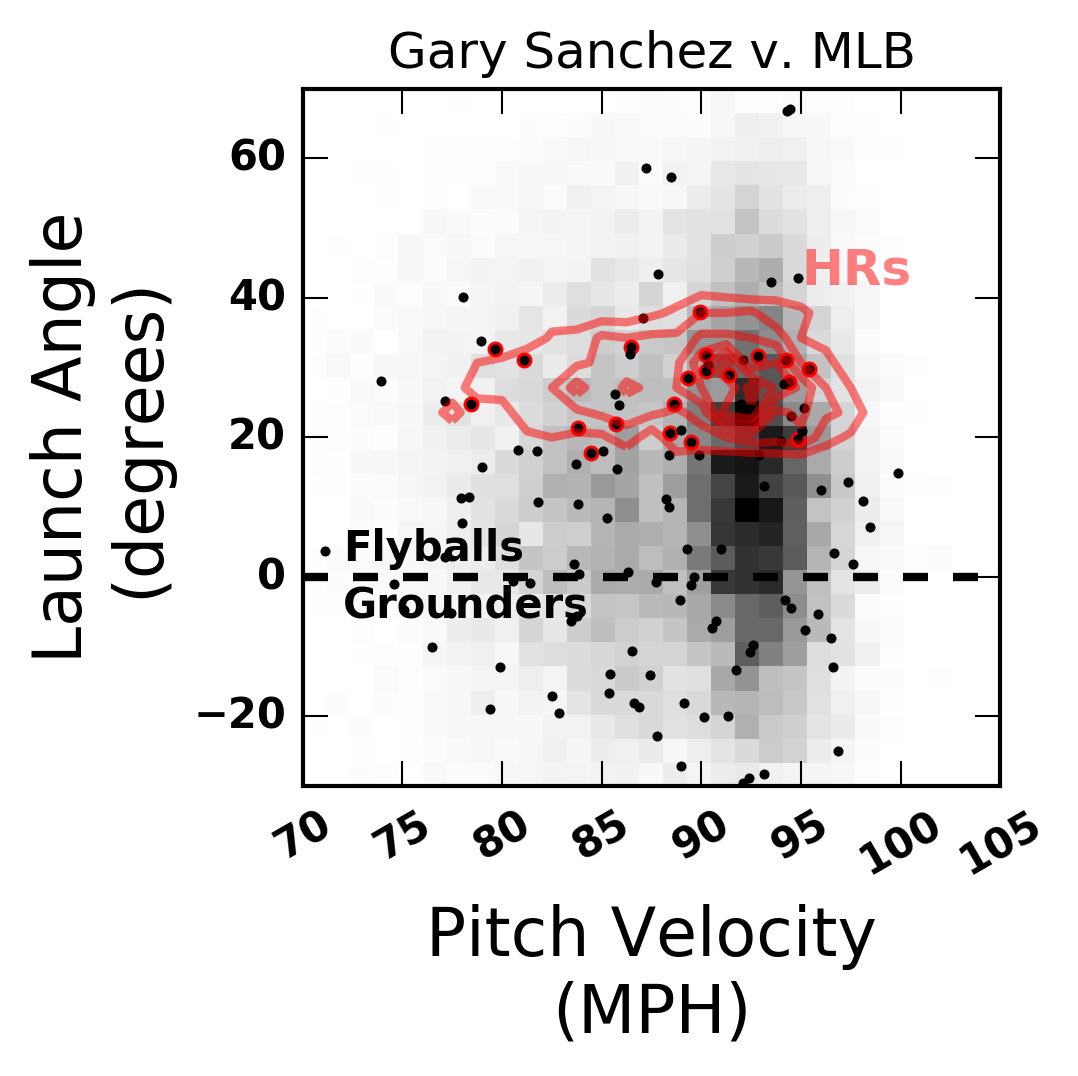

In [6]:
# add the sanchez points

hrs = np.where(Sanchez['events'] == 'Home Run')[0]

ax.set_title('Gary Sanchez v. MLB')
sanchez1 = ax.scatter(Sanchez['start_speed'][hrs],Sanchez['hit_angle'][hrs],color='red',s=8.)
sanchez2 = ax.scatter(Sanchez['start_speed'],Sanchez['hit_angle'],color='black',s=2.)



fig

Uh oh, this is making me think that Sanchez might not be as anomalous as I originally expected. We need a comparison, I think. How about the 2016 NL MVP?

In [7]:
print('In 2016, NL MVP Kris Bryant hit {0:2d} HRs in {1:3d} PAs (HR/PA of {2:4.3f}).'.format(\
               int(Total2016['HR'][np.where(Total2016['Name']=='Kris Bryant')[0]][0]),\
               int(Total2016['PA'][np.where(Total2016['Name']=='Kris Bryant')[0]][0]),\
               (Total2016['HR']/Total2016['PA'])[np.where(Total2016['Name']=='Kris Bryant')[0]][0]))

In 2016, NL MVP Kris Bryant hit 39 HRs in 699 PAs (HR/PA of 0.056).


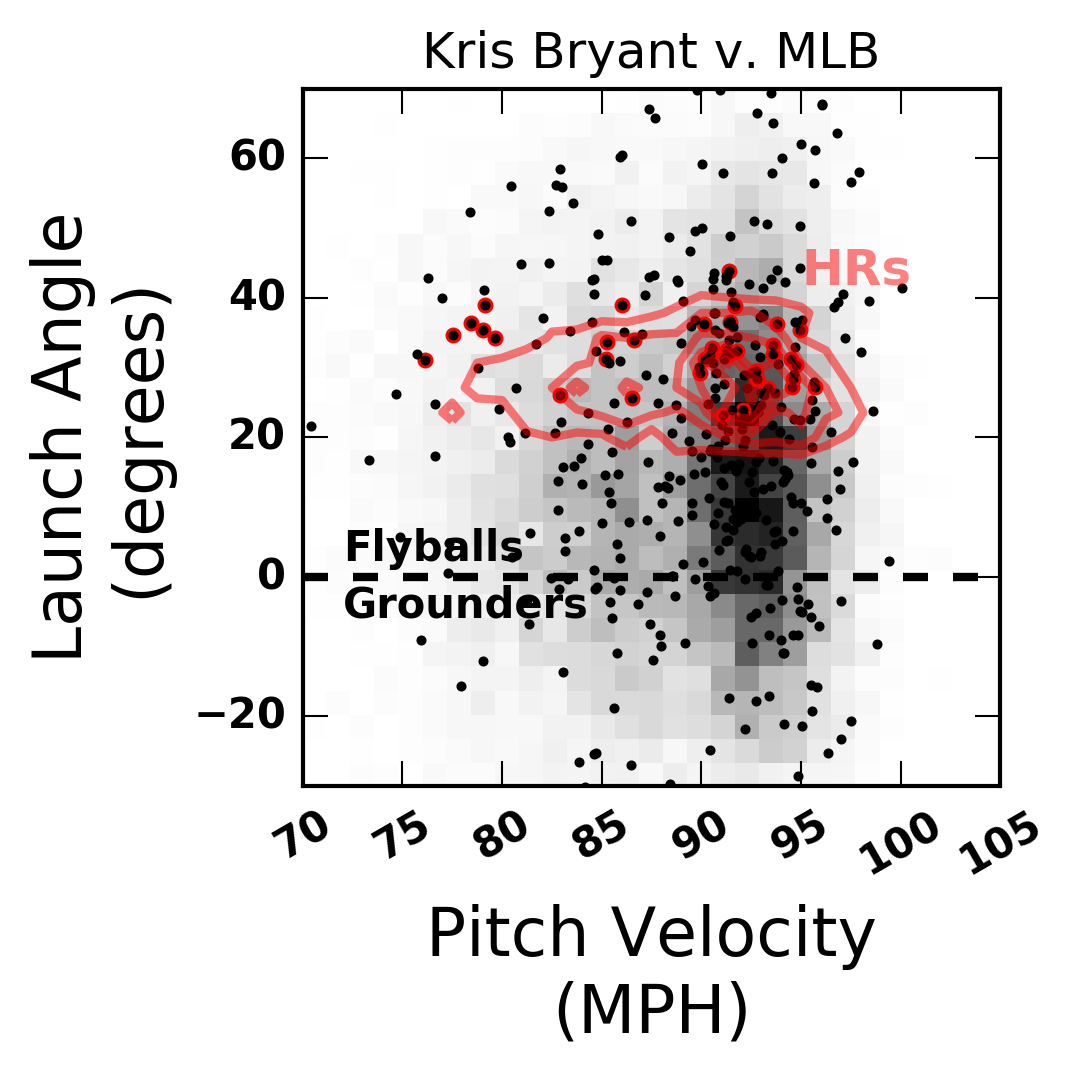

In [8]:
# remove sanchez points and update
sanchez1.remove()
sanchez2.remove()
fig.canvas.draw()

# now on to Bryant
ax.set_title('Kris Bryant v. MLB')

hrs = np.where(Bryant['events'] == 'Home Run')[0]

ax.scatter(Bryant['start_speed'][hrs],Bryant['hit_angle'][hrs],color='red',s=8.)
ax.scatter(Bryant['start_speed'],Bryant['hit_angle'],color='black',s=2.)

fig


Do you think Kris Bryant's hitting is sustainable? Sanchez resides in essentially the same location, which is fairly typical of the entire MLB. I'm worried I may have misjudged Sanchez' staying power...hence why he was an 8th round pick in our league.

Finally, just a couple notes on the notion of a '3 True Outcomes' player and the relationship between Home Runs and Strikeouts.

The top 13 3TO players
----------------------
0.589 Alex Avila                    
0.552 Tommy Pham                    
0.545 Keon Broxton                  
0.541 Jarrod Saltalamacchi          
0.537 David Wright                  
0.532 Adam Rosales                  
0.523 Chris Davis                   
0.521 Miguel Sano                   
0.520 Kennys Vargas                 
0.518 Kirk Nieuwenhuis              
0.515 Ryan Schimpf                  
0.510 Mike Zunino                   
0.503 Chris Carter                  


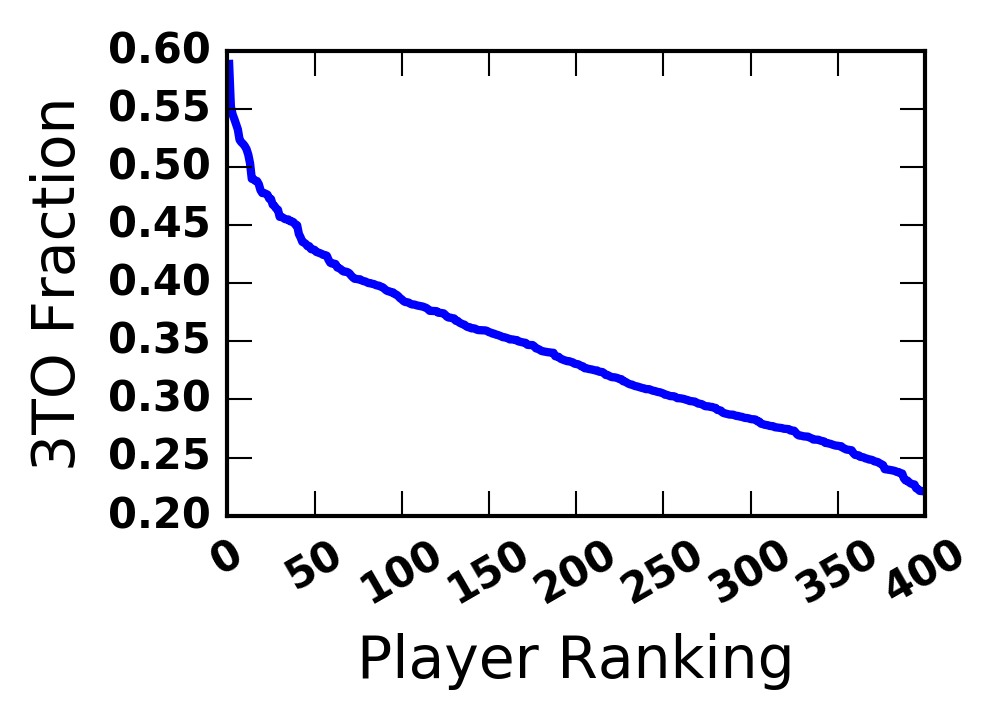

In [9]:
hrs = Total2016['HR']
sos = Total2016['SO']
pas = Total2016['PA']
three_true = (Total2016['HR']+Total2016['SO']+Total2016['BB']+Total2016['IBB'])/Total2016['PA']
names = Total2016['Name']

fig = plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)
ax.set_ylabel('3TO Fraction',size=14)
ax.set_xlabel('Player Ranking',size=14)

ax.plot(np.linspace(1.,400.,400),three_true[(-1.*three_true).argsort()][0:400])

for label in ax.get_xticklabels():
    label.set_rotation(30)
    #label.set_fontsize(10)
    label.set_horizontalalignment("center")



print ('The top 13 3TO players')
print ('----------------------')
for indx in range(0,13):
    print('{0:4.3f} {1:<30}'.format(three_true[(-1.*three_true).argsort()][indx],names[(-1.*three_true).argsort()][indx]))



Hey, these guys aren't that good...so maybe this is a little something to watch out for. And Salty just got picked up (4.2.2017)!

The relationship between HR/PA and K/PA is actually more illuminating, and suggests that while 3TO percentage is a bad indicator, K/PA actually can be a positive (albeit highly uncertain) indicator of HR potential!

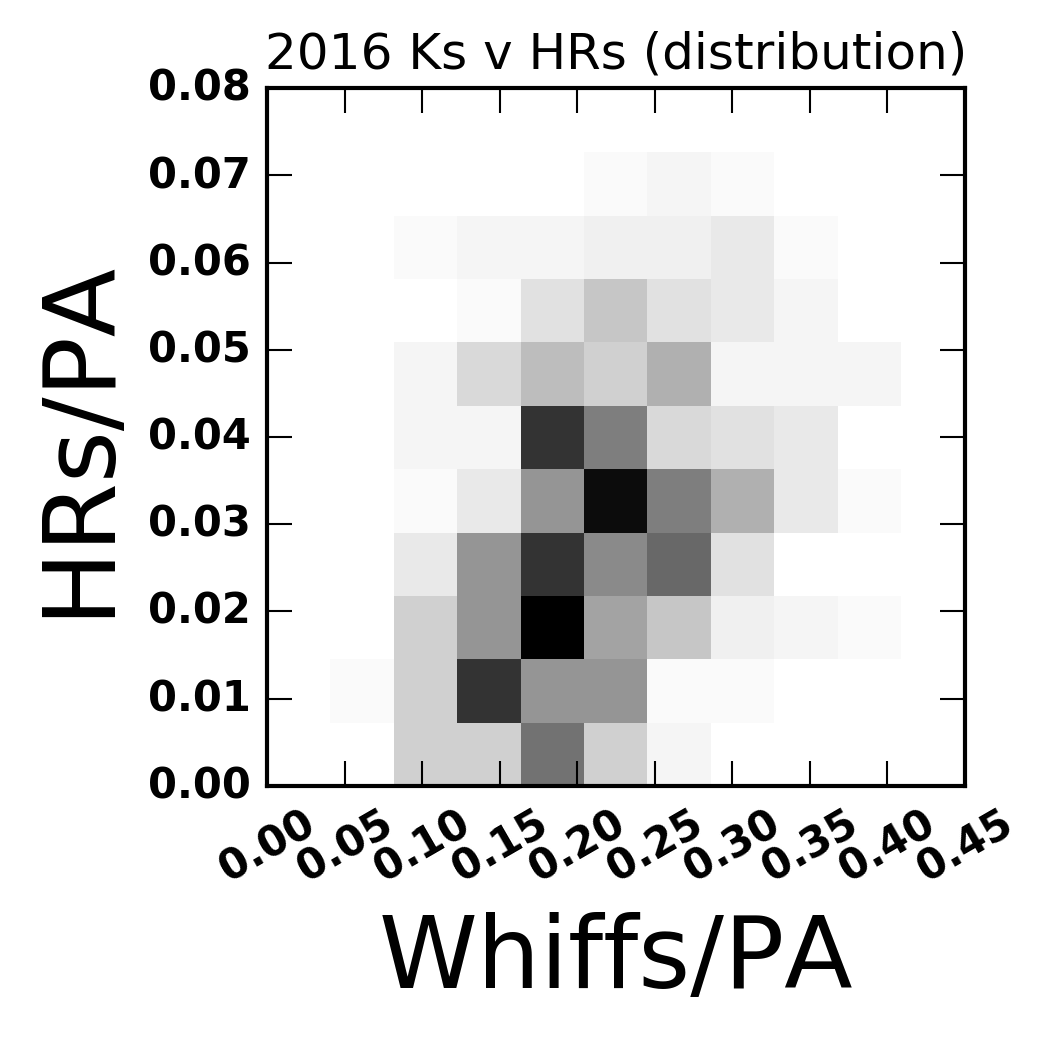

In [10]:

H, xedges, yedges = np.histogram2d(sos/pas,hrs/pas, bins=(np.linspace(0.,0.45,12),np.linspace(0.,0.08,12)))
H = H.T  # Let each row list bins with common y range.

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111, title='2016 Ks v HRs (distribution)')
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H,cmap=cm.Greys)
ax.set_xlabel('Whiffs/PA',size=24)
ax.set_ylabel('HRs/PA',size=24)
ax.axis([xedges[0],xedges[-1],yedges[0],yedges[-1]])

for label in ax.get_xticklabels():
    label.set_rotation(30)
    #label.set_fontsize(10)
    label.set_horizontalalignment("center")

Quick follow-up: what about hit velocity?

/Users/mpetersen/anaconda/lib/python2.7/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


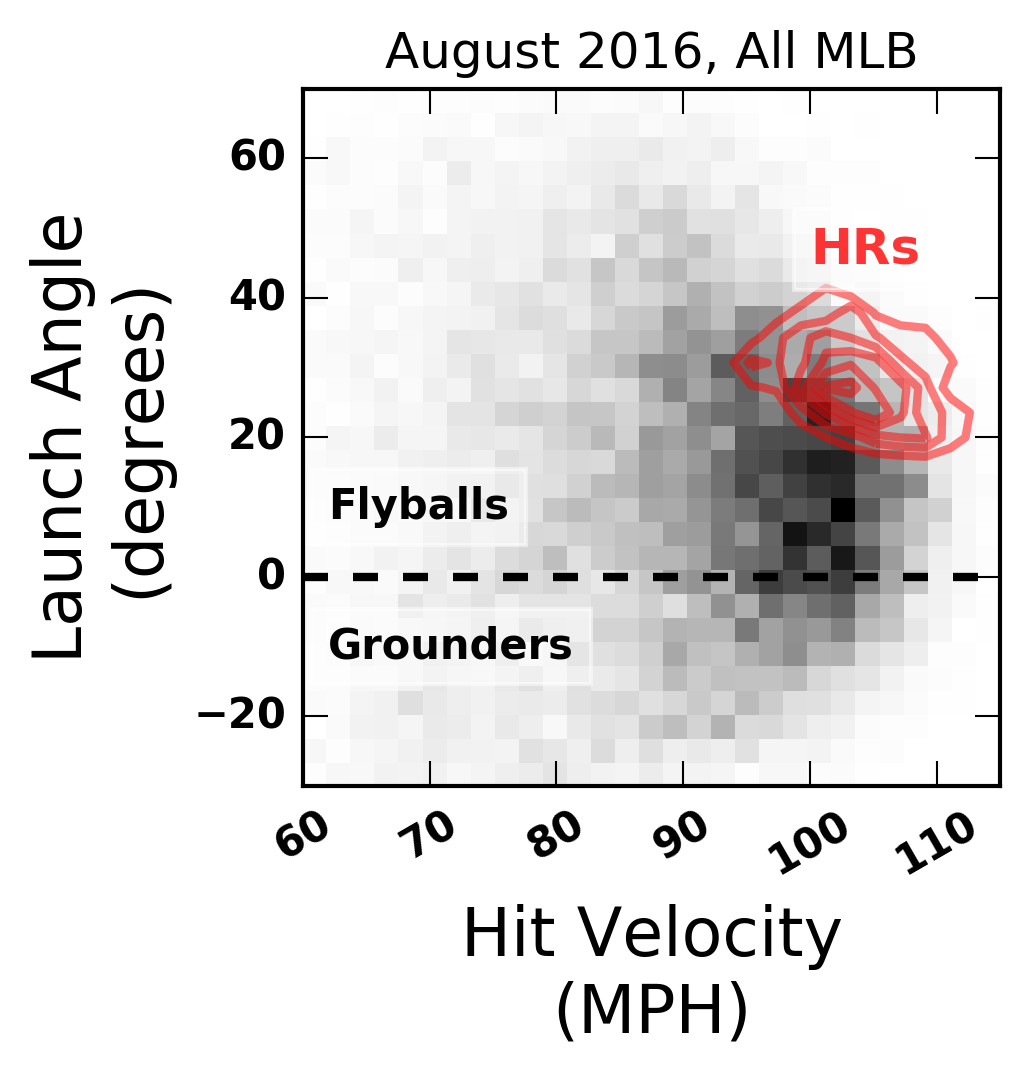

In [11]:
hrs = np.where(AugustMLB['events'] == 'Home Run')[0]

G, xedges, yedges = np.histogram2d(AugustMLB['hit_speed'][hrs],AugustMLB['hit_angle'][hrs], \
                                   bins=(np.linspace(60.,115.,30),np.linspace(-30.,70.,30)))
G = G.T  # Let each row list bins with common y range.


H, xedges, yedges = np.histogram2d(AugustMLB['hit_speed'],AugustMLB['hit_angle'], \
                                   bins=(np.linspace(60.,115.,30),np.linspace(-30.,70.,30)))
H = H.T  # Let each row list bins with common y range.

fig,ax = plt.subplots(figsize=(3,3))
ax.set_title('August 2016, All MLB')
X, Y = np.meshgrid(xedges, yedges)
X2, Y2 = np.meshgrid(np.linspace(60.,115.,29),np.linspace(-30.,70.,29))
ax.pcolormesh(X, Y, H,cmap=cm.Greys)
ax.contour(X2,Y2,G,6,colors='red',lw=0.05,alpha=0.5)
ax.set_xlabel('Hit Velocity\n(MPH)',size=16)
ax.set_ylabel('Launch Angle\n(degrees)',size=16)
ax.axis([xedges[0],xedges[-1],yedges[0],yedges[-1]])

for label in ax.get_xticklabels():
    label.set_rotation(30)
    #label.set_fontsize(10)
    label.set_horizontalalignment("center")

ax.plot([60,115],[0.,0.],color='black',linestyle='dashed')
t = ax.text(62,7,'Flyballs',va='bottom')
u = ax.text(62,-7,'Grounders',va='top')
v = ax.text(100,45,'HRs',color='red',alpha=0.8,size=12)
t.set_bbox(dict(color='white', alpha=0.5, edgecolor='None'))
u.set_bbox(dict(color='white', alpha=0.5, edgecolor='None'))
v.set_bbox(dict(color='white', alpha=0.5, edgecolor='None'))




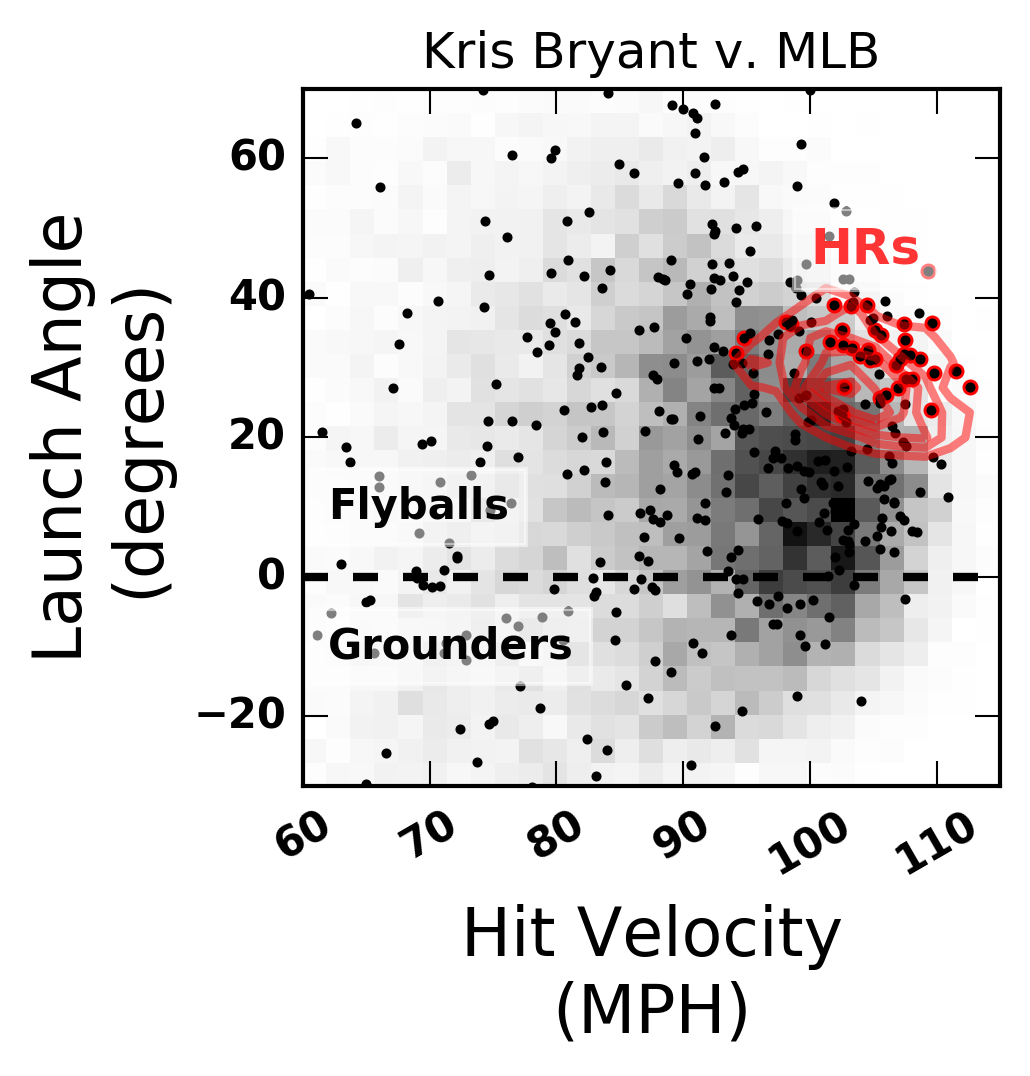

In [12]:
# let's add the kris bryant points for fun

# now on to Bryant
ax.set_title('Kris Bryant v. MLB')

hrs = np.where(Bryant['events'] == 'Home Run')[0]

ax.scatter(Bryant['hit_speed'][hrs],Bryant['hit_angle'][hrs],color='red',s=8.)
ax.scatter(Bryant['hit_speed'],Bryant['hit_angle'],color='black',s=2.)

fig

